In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


In [5]:
energy_attributes = []

with h5py.File('../glucose_data.h5', 'r') as f:
    def find_attr(name, obj):
        if 'energy' in obj.attrs:
            val = obj.attrs['energy']
            energy_attributes.append(val)
            
    f.visititems(find_attr)
#print("Attributes found:", energy_attributes)
energies = np.array(energy_attributes)
print("min {} max {} mean {} std {}".format(energies.min(), energies.max(), energies.mean(), energies.std()))

min 127.12666909295419 max 221.29793439840907 mean 155.27745727531658 std 16.84087914943469


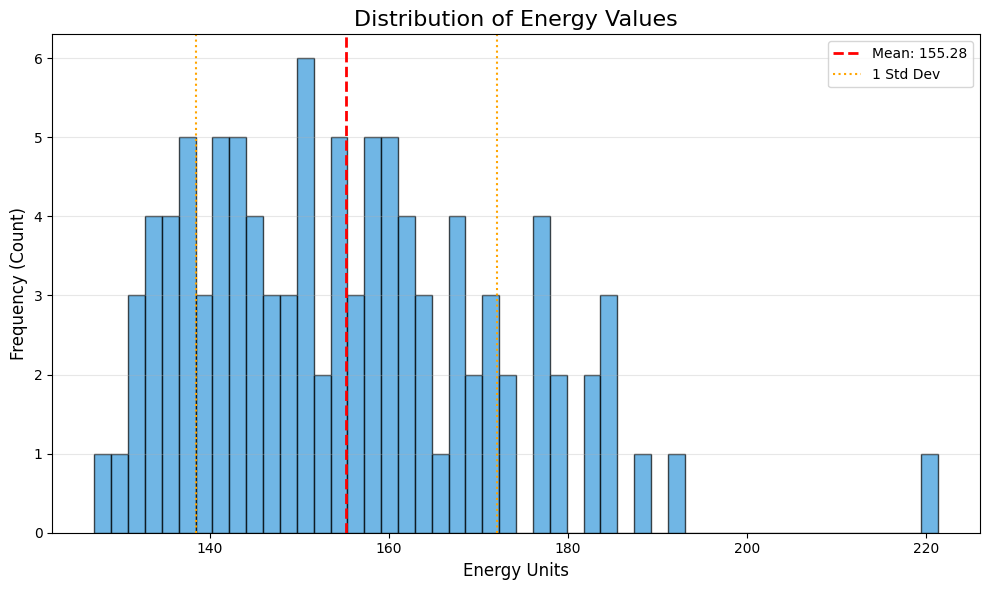

In [8]:
%matplotlib inline


v_max = np.max(energies)
v_min = np.min(energies)
v_std = np.std(energies)
v_mean = np.mean(energies)

# 1. Create the figure
plt.figure(figsize=(10, 6))

# 2. Plot the histogram
# 'bins' determines how many bars you see. 50 is usually a good balance.
n, bins, patches = plt.hist(energies, bins=50, color='#3498db', edgecolor='black', alpha=0.7)

# 3. Add statistical reference lines
plt.axvline(v_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {v_mean:.2f}')
plt.axvline(v_mean + v_std, color='orange', linestyle='dotted', linewidth=1.5, label='1 Std Dev')
plt.axvline(v_mean - v_std, color='orange', linestyle='dotted', linewidth=1.5)

# 4. Styling and Labels
plt.title('Distribution of Energy Values', fontsize=16)
plt.xlabel('Energy Units', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 5. Show the plot
plt.tight_layout()
plt.show()